<a href="https://colab.research.google.com/github/emm-gl/Vision/blob/main/3_2_Algoritmos_de_mejoramiento_de_im%C3%A1genes_en_el_dominio_espaciald.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los ejercicios que deben agregarse a este proyecto serán los siguientes:

1.   Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

2.   Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

3. Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes


In [1]:
#Import
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

from urllib.request import urlopen
from PIL import Image, ImageFilter
from io import BytesIO

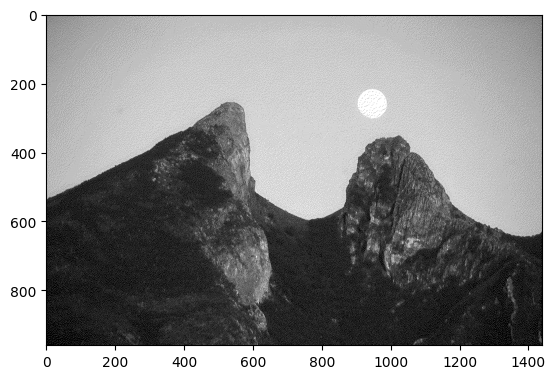

In [2]:
#Get Image:

#Function to get an image from internet:
def get_image_from_url(url):
    try:
        response = urlopen(url)
        image_data = response.read()
        image = Image.open(BytesIO(image_data))
        return image
    except Exception as e:
        print(f"Error: {e}")
        return None

image_url = "https://tipsparatuviaje.com/wp-content/uploads/2019/02/que-es-el-cerro-de-la-silla.jpg"

image =  get_image_from_url(image_url)
image = image.convert('1') # convert image to black and white

image = np.array(image)
plt.imshow(image, cmap='gray',vmin=0.0, vmax=1.0)
plt.show()

In [3]:
#Convolution function:

def apply_filter(I, H):
    h, w = I.shape                         # image dimensions (height, width)
    n = H.shape[0]                         # filter size
    p = n // 2                             # padding size
    J = np.zeros_like(I)                   # output image, initialized with zeros

    for x in range(p, h-p):
        for y in range(p, w-p):
            J[x, y] = np.sum(I[x-p:x+n-p, y-p:y+n-p] * H)
    return J

#Prewitt filter:

Reference:
https://fiveko.com/prewitt-operator-for-edge-detection/

In [13]:
#Kernels:
Hx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
Hy = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

#Apply filters in X and Y (convolation of kernel and Image):
Jx = apply_filter(image, Hx)
Jy = apply_filter(image, Hy)

print("Kernel to find edges in X direction:")
print(Hx)
print("\n Kernel to find edges in y direction:")
print(Hy)

Kernel to find edges in X direction:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

 Kernel to find edges in y direction:
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


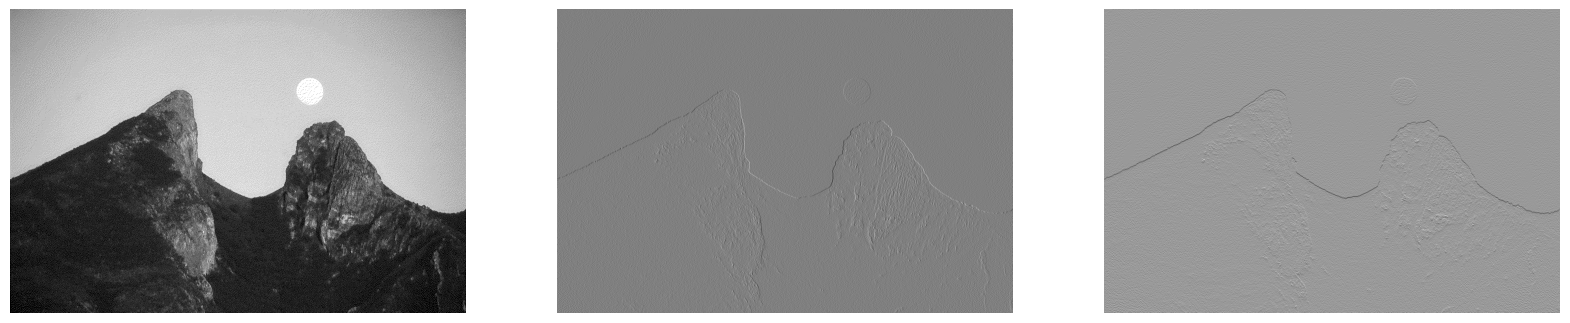

In [14]:
#Plotting images: Original
image = image.astype(float)
Images = np.array([image, Jx, Jy])
plt.figure(figsize = (20, 20))

for i in range(Images.shape[0]):
    plt.subplot(1, Images.shape[0], i + 1)
    plt.imshow(Images[i], cmap='gray')
    plt.axis('off')  # no axis

plt.show()

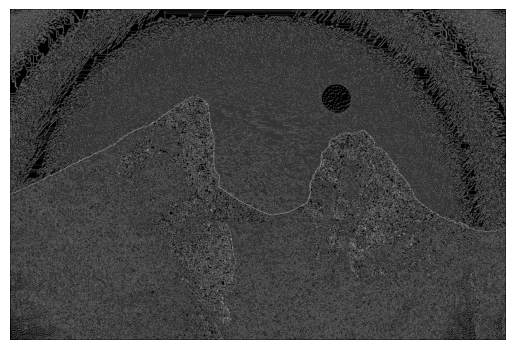

In [15]:
#Magnitude image:
edge_magnitude = np.sqrt(Jx**2 + Jy**2)

plt.imshow(edge_magnitude,cmap='gray')
plt.axis('off')  # no axis
plt.show()

#Sobel filter:

Reference: https://fiveko.com/sobel-filter/

In [7]:
#Kernels:
Hx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Hy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

#Apply filters in X and Y (convolation of kernel and Image):
Jx = apply_filter(image, Hx)
Jy = apply_filter(image, Hy)

print("Kernel to find edges in X direction:")
print(Hx)
print("\n Kernel to find edges in y direction:")
print(Hy)

Kernel to find edges in X direction:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

 Kernel to find edges in y direction:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


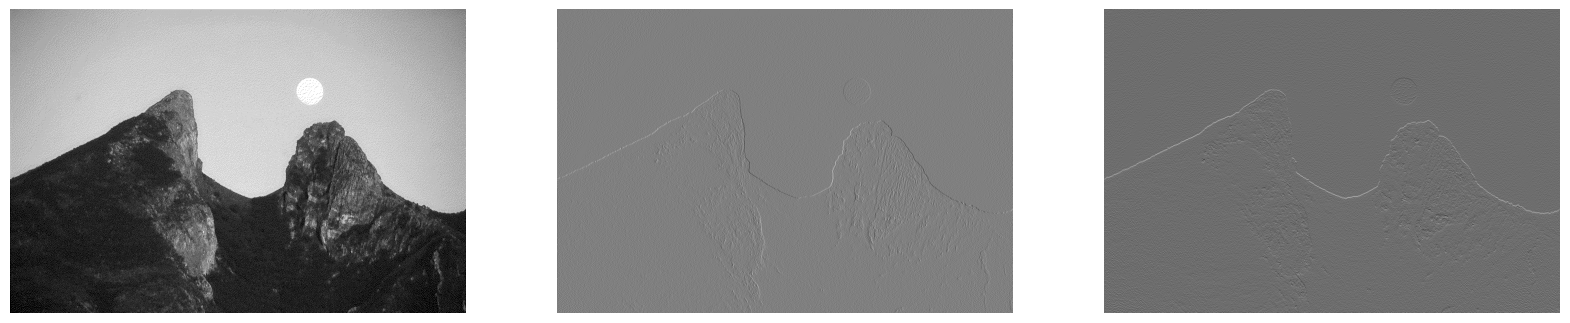

In [8]:
#Plotting images:
image = image.astype(float)
Images = np.array([image, Jx, Jy])
plt.figure(figsize = (20, 20))

for i in range(Images.shape[0]):
    plt.subplot(1, Images.shape[0], i + 1)
    plt.imshow(Images[i], cmap='gray')
    plt.axis('off')  # no axis

plt.show()

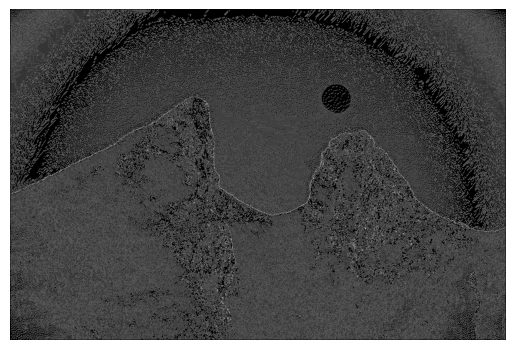

In [9]:
#Magnitude image:
edge_magnitude = np.sqrt(Jx**2 + Jy**2)

plt.imshow(edge_magnitude,cmap='gray')
plt.axis('off')  # no axis
plt.show()